In [ ]:
from google.colab import drive
drive.mount('gdrive')
##I have used colab

In [2]:
!pip install lightgbm 

    100% |████████████████████████████████| 1.1MB 15.3MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize

# This is data preprocessing part

**Initial data cleaning part of the assignment was done by me in kaggle kernel I am copying the same code of mine  to show how I did data cleaning **

In [0]:
train_df = pd.read_csv("../input/train.csv",dtype={'fullVisitorId': 'str'})
test_df = pd.read_csv("../input/test.csv" , dtype = {'fullVisitorId' : 'str'})

In [0]:
df_combi=pd.concat([train_df,test_df],ignore_index=True)

In [0]:
z = []
for a in df_combi['device']:
    z.append(json.loads(a))
z = np.asarray(z)
device_c = json_normalize(z)

In [0]:
column_names = device_c.columns
for name in column_names:
    print("name {} || different: {}".format(name,device_c[name].unique().shape[0] ))
    print("/////////////////////////////")

In [0]:
z = []
for a in df_combi['geoNetwork']:
    z.append(json.loads(a))
z = np.asarray(z)
geoNetwork_c = json_normalize(z)
geoNetwork_c.head()

In [0]:
z = []
for a in df_combi['totals']:
    z.append(json.loads(a))
z = np.asarray(z)
totals_c = json_normalize(z)
totals_c.head()

In [0]:
column_names = totals_c.columns
for name in column_names:
    print("name {} || different: {}".format(name,totals_c[name].unique().shape[0] ))#,g[name].unique()
    print("/////////////////////////////")

In [0]:
totals_c = totals_c[['bounces','hits','newVisits','pageviews','transactionRevenue']]

In [0]:
z = []
for a in df_combi['trafficSource']:
    z.append(json.loads(a))
z = np.asarray(z)
trafficSource_c = json_normalize(z)
trafficSource_c.head()

In [0]:
trafficSource_c = trafficSource_c[["adContent","adwordsClickInfo.gclId",'adwordsClickInfo.page',"medium","source","referralPath"]]

In [0]:
extra = [device_c,geoNetwork_c,totals_c,trafficSource_c]
for df in extra:
    df_combi = df_combi.merge(df, right_index=True, left_index=True)
df_combi.shape

In [0]:
df_combi = df_combi.drop(["device","geoNetwork","totals","trafficSource"], axis = 1)

In [0]:
test_df = df_combi.iloc[903653:,:]
train_df = df_combi.iloc[:903653,:]


In [0]:
test_df["transactionRevenue"].unique()

In [0]:
train_df["transactionRevenue"].unique().shape

In [0]:
print("Number of unique visitors in train set : ",train_df.fullVisitorId.nunique(), " out of rows : ",train_df.shape[0])
print("Number of unique visitors in test set : ",test_df.fullVisitorId.nunique(), " out of rows : ",test_df.shape[0])
print("Number of common visitors in train and test set : ",len(set(train_df.fullVisitorId.unique()).intersection(set(test_df.fullVisitorId.unique())) ))

In [0]:
train_df["transactionRevenue"].fillna(0, inplace=True)

In [0]:
train_df["transactionRevenue"].unique().shape

In [0]:
train_df["date"] = pd.to_datetime(train_df["date"],format="%Y%m%d")
train_df["visitStartTime"] = pd.to_datetime(train_df["visitStartTime"],unit='s')


In [0]:
train_df["transactionRevenue"] = train_df["transactionRevenue"].astype('float')
test_df = test_df.drop("transactionRevenue",axis = 1)


In [0]:
#preprocessing

In [0]:
print(train_df.shape)
print(train_df.dtypes)
train_df.head()

In [0]:
z = []
for a in train_df['device']:
    z.append(json.loads(a))
z = np.asarray(z)
device_c = json_normalize(z)

In [0]:
device_c = json_normalize(z)

In [95]:
train_df.dtypes

channelGrouping                                          int64
date                                            datetime64[ns]
fullVisitorId                                           object
sessionId                                               object
visitId                                                  int64
visitNumber                                              int64
visitStartTime                                           int64
device.browser                                           int64
device.deviceCategory                                    int64
device.isMobile                                           bool
device.operatingSystem                                   int64
geoNetwork.city                                          int64
geoNetwork.continent                                     int64
geoNetwork.country                                       int64
geoNetwork.metro                                         int64
geoNetwork.networkDomain                               

rather than running same code again and again I am reading the falttened csv file

In [133]:
train_df = pd.read_csv("gdrive/My Drive/datasets/train-flattened.csv") #json fields are falttened for this file

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
train_df.shape

(903653, 55)

In [134]:
test_df = pd.read_csv("gdrive/My Drive/datasets/test-flattened.csv") #json fields are falttened

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
test_df["trafficSource.adContent"].unique()

array([nan, 'Bags 336x280', 'Google Merchandise Store',
       'Placement Accessories 300 x 250', 'Placement Office 300x250',
       'Bags 300x250', 'Display Ad created 3/11/14',
       'Placement Drinkware 300x250', 'Office Placement 160x600',
       'test_tyler_hr_merchant', 'Official Google Merchandise',
       'Drinkware 336x280', 'Ad from 12/15/17', 'BQ',
       'Smart display ad - 8/17/2017', 'Placement Accessores 300 x 250',
       'Placement Accessories 160 x 600',
       'Placement Accessories 336 x 280', 'Google Merchandise Collection',
       'Placement Elecronics 300 x 250',
       'Placement Electronics 160 x 600', 'Placement 336x280',
       'Google Online Store', 'Placement 300 x 250',
       'Placememnt Drinkware 160x600', '{KeyWord:Google Merchandise}',
       'Swag with Google Logos', 'Placement Accessories2 120 x 600',
       'Office 2018 - 120 x 600', 'Ad from 12/21/16', 'Google Store',
       'Bags 160 x 600', "{KeyWord:Google Men's T-Shirts}",
       'Smart displa

In [119]:
test_df.shape

(804684, 34)

In [385]:
for column  in train_df.columns:
  print("{}:{}".format(column,len(train_df[column].unique())))

channelGrouping:8
date:366
fullVisitorId:723803
sessionId:902755
socialEngagementType:1
visitId:886303
visitNumber:384
visitStartTime:887159
device.browser:54
device.browserSize:1
device.browserVersion:1
device.deviceCategory:3
device.flashVersion:1
device.isMobile:2
device.language:1
device.mobileDeviceBranding:1
device.mobileDeviceInfo:1
device.mobileDeviceMarketingName:1
device.mobileDeviceModel:1
device.mobileInputSelector:1
device.operatingSystem:20
device.operatingSystemVersion:1
device.screenColors:1
device.screenResolution:1
geoNetwork.city:649
geoNetwork.cityId:1
geoNetwork.continent:6
geoNetwork.country:222
geoNetwork.latitude:1
geoNetwork.longitude:1
geoNetwork.metro:94
geoNetwork.networkDomain:28064
geoNetwork.networkLocation:1
geoNetwork.region:376
geoNetwork.subContinent:23
totals.bounces:2
totals.hits:274
totals.newVisits:2
totals.pageviews:214
totals.transactionRevenue:5333
totals.visits:1
trafficSource.adContent:45
trafficSource.adwordsClickInfo.adNetworkType:3
traffic

In [0]:
for column in train_df.columns:
  if len(train_df[column].unique()) == 1:
    train_df = train_df.drop(column,axis = 1)
    test_df = test_df.drop(column,axis = 1)
train_columns = train_df.columns
test_columns = test_df.columns
diff = list(set(train_columns) - set(test_columns))
train_df = train_df.drop("trafficSource.campaignCode",axis= 1) #not present in test_df

In [0]:
train_df["totals.transactionRevenue"].fillna(0,inplace =True)
#train_df["totals.transactionRevenue"] = np.log1p(train_df["totals.transactionRevenue"].values)

In [136]:
def add_date(tr_df):
  tr_df['date'] = tr_df['date'].astype(str)
  tr_df["date"] = tr_df['date'].apply(lambda x : x[:4] +"-" + x[4:6]+"-"+ x[6:])
  tr_df["date"] = pd.to_datetime(tr_df["date"])
  tr_df["month"] = tr_df["date"].dt.month
  tr_df["weekday"] = tr_df["date"].dt.weekday
  tr_df["day"] = tr_df["date"].dt.weekday
  return tr_df
train_df = add_date(train_df)
test_df = add_date(test_df)
print(train_df.shape)
print(test_df.shape)


(903653, 38)
(804684, 37)


In [0]:
test_df = add_date(test_df)

In [0]:
#test_df.month

# Plots

**Graph based on geographical features** There are few plots 

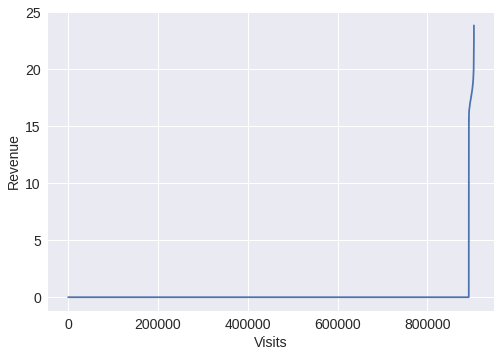

In [199]:
z = train_df["totals.transactionRevenue"]
plt.plot(np.sort(z))
plt.xlabel('Visits',fontsize=14)
plt.ylabel('Revenue',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.show()
#this  proves the 20:80 rule (20% visitors only contribute to 80% of revenue)

**OS and visits vs OS and Revenue**

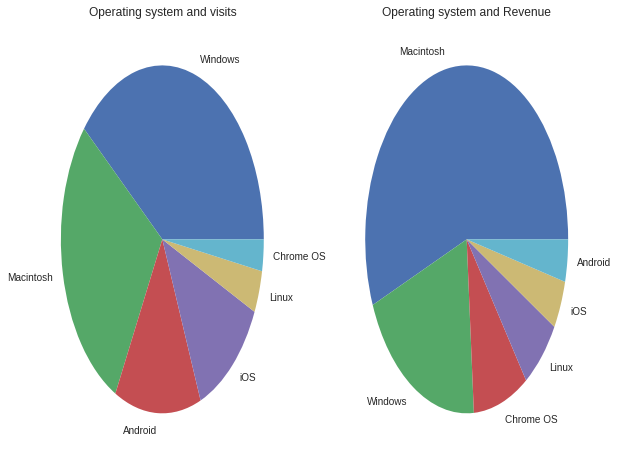

In [200]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
tmp = train_df["device.operatingSystem"].value_counts()
c = tmp.index
c = c.tolist()
plt.pie(tmp[0:6],labels = c[0:6])
plt.title("Operating system and visits")
plt.subplot(1,2,2)
z = train_df.groupby("device.operatingSystem")["totals.transactionRevenue"].sum()
z = z.sort_values(ascending = False)
c = z.index
c = c.tolist()
plt.pie(z.iloc[0:6,],labels = c[0:6])
plt.title("Operating system and Revenue")
plt.show()
plt.savefig("gdrive/My Drive/Z_OS.png")

In [0]:

# c = tmp.index
# c = c.tolist()
# plt.pie(tmp[0:6],labels = c[0:6])


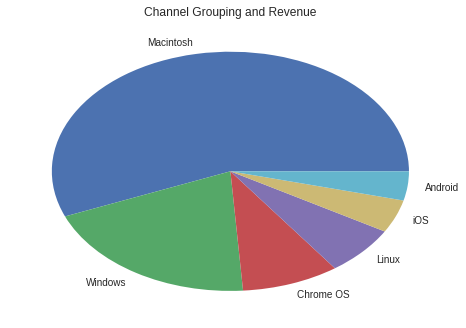

In [128]:

# z = z.sort_values(ascending = False)
# c = z.index
# c = c.tolist()
# plt.pie(z.iloc[0:6,],labels = c[0:6])
# plt.title("Channel Grouping and Revenue")
# plt.show()

Text(0.5,1,'channelGrouping and visits')

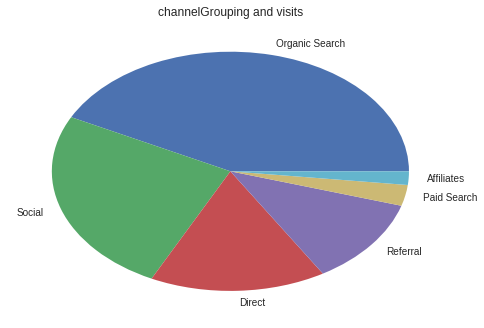

In [132]:
# tmp = train_df["channelGrouping"].value_counts()
# c = tmp.index
# c = c.tolist()
# plt.pie(tmp[0:6],labels = c[0:6])
# plt.title("channelGrouping and visits")

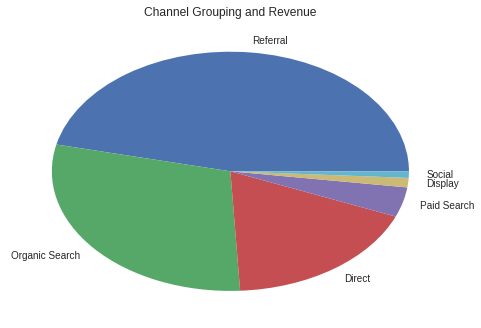

In [201]:
z = train_df.groupby("channelGrouping")["totals.transactionRevenue"].sum()
z = z.sort_values(ascending = False)
c = z.index
c = c.tolist()
plt.pie(z.iloc[0:6,],labels = c[0:6])
plt.title("Channel Grouping and Revenue")
plt.show()

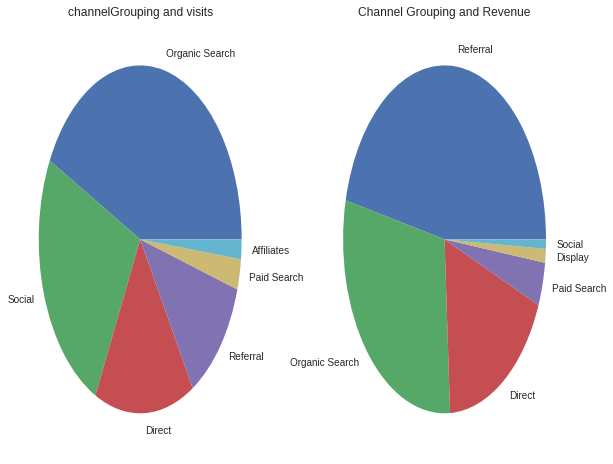

In [202]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
tmp = train_df["channelGrouping"].value_counts()
c = tmp.index
c = c.tolist()
plt.pie(tmp[0:6],labels = c[0:6])
plt.title("channelGrouping and visits")
plt.subplot(1,2,2)
z = train_df.groupby("channelGrouping")["totals.transactionRevenue"].sum()
z = z.sort_values(ascending = False)
c = z.index
c = c.tolist()
plt.pie(z.iloc[0:6,],labels = c[0:6])
plt.title("Channel Grouping and Revenue")
plt.show()
plt.savefig("gdrive/My Drive/Z_channelG.png")

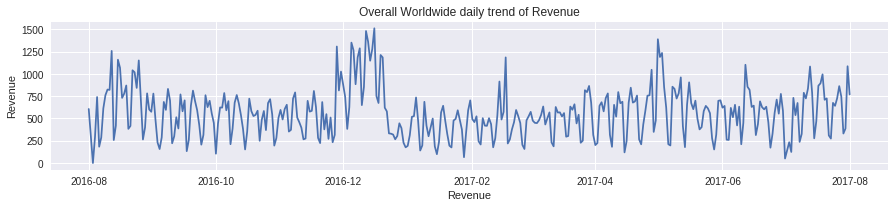

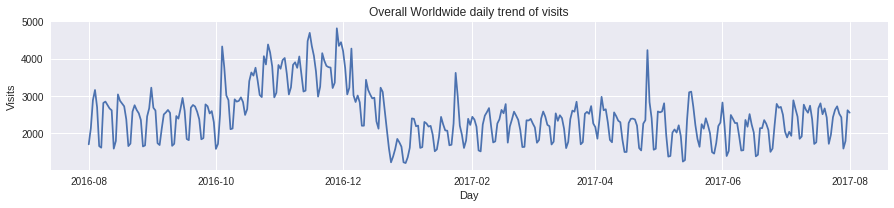

In [203]:
date1 = train_df.groupby("date")["totals.transactionRevenue"].sum()
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(date1)
plt.title("Overall Worldwide daily trend of Revenue")
plt.ylabel("Revenue")
plt.xlabel("Revenue")
plt.show()
plt.figure(figsize=(15,6))
date2 = train_df.groupby("date")["totals.transactionRevenue"].count()
plt.subplot(2,1,2)
plt.plot(date2)
plt.title("Overall Worldwide daily trend of visits")
plt.ylabel("Visits")
plt.xlabel("Day")
plt.show()


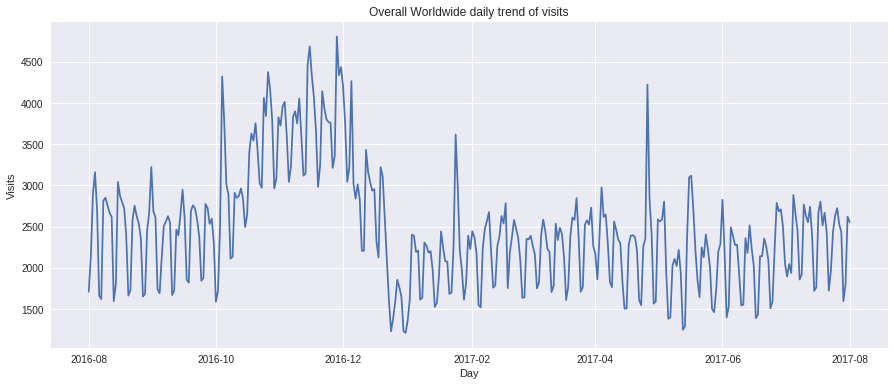

In [204]:
plt.figure(figsize=(15,6))
plt.plot(date2)
plt.title("Overall Worldwide daily trend of visits")
plt.ylabel("Visits")
plt.xlabel("Day")
plt.show()

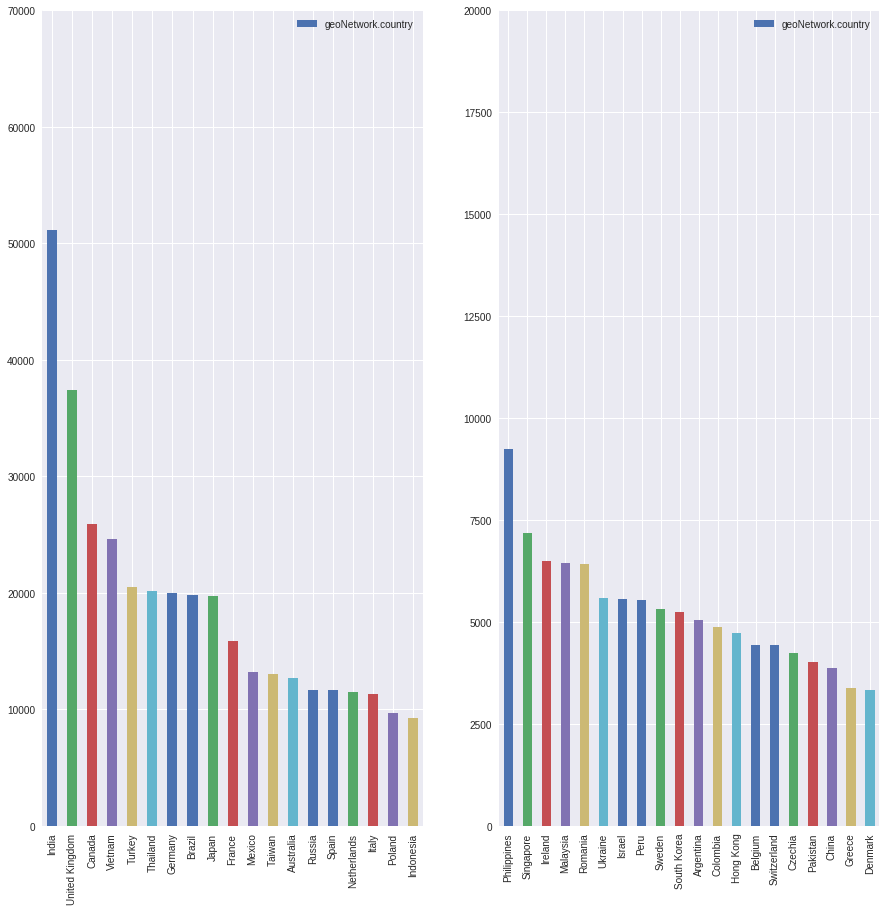

In [205]:
#Country wise visits and country wise revenue  #excluding united states
fig, axes = plt.subplots(1,2,figsize=(15,15), squeeze = False)
train_df["geoNetwork.country"].value_counts().iloc[1:20].plot(kind = "bar",ax = axes[0][0],ylim = (0,70000),legend="harrypotter")
train_df["geoNetwork.country"].value_counts().iloc[20:40].plot(kind = "bar",ylim = (0,20000),legend = "harrypotter")

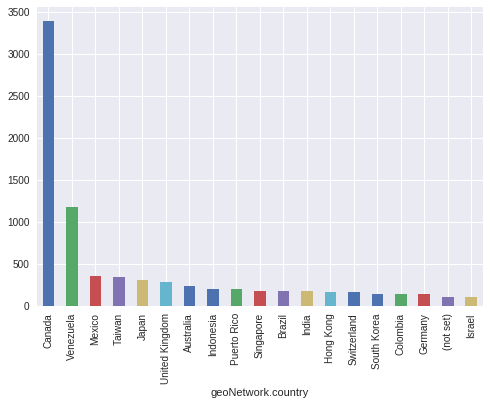

In [56]:
z = train_df.groupby("geoNetwork.country")["totals.transactionRevenue"].sum()
z = z.sort_values(ascending= False)
z[1:20,].plot.bar()

In [0]:
train_df["geoNetwork.country"].value_counts().iloc[1:20].plot(kind = "bar",ax = axes[0][0],ylim = (0,70000),legend="harrypotter")
z = train_df.groupby("geoNetwork.country")["totals.transactionRevenue"].sum()
z = z.sort_values(ascending= False)
z[1:20,].plot.bar()

In [62]:
train_df["geoNetwork.country"].value_counts().iloc[0:20]

United States     364744
India              51140
United Kingdom     37393
Canada             25869
Vietnam            24598
Turkey             20522
Thailand           20123
Germany            19980
Brazil             19783
Japan              19731
France             15832
Mexico             13225
Taiwan             12996
Australia          12698
Russia             11662
Spain              11658
Netherlands        11453
Italy              11332
Poland              9693
Indonesia           9273
Name: geoNetwork.country, dtype: int64

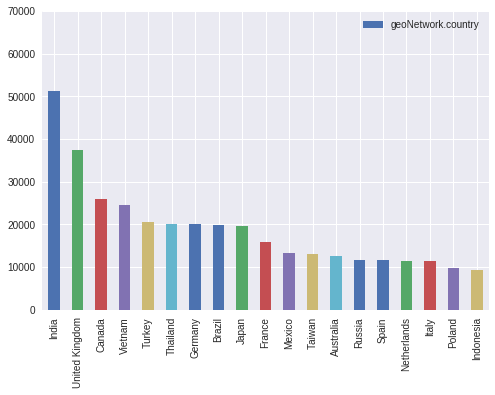

In [57]:
train_df["geoNetwork.country"].value_counts().iloc[1:20].plot(kind = "bar",ylim = (0,70000),legend="harrypotter")

# Geoclustering

Text(0.5,1,'Revenue generated by country')

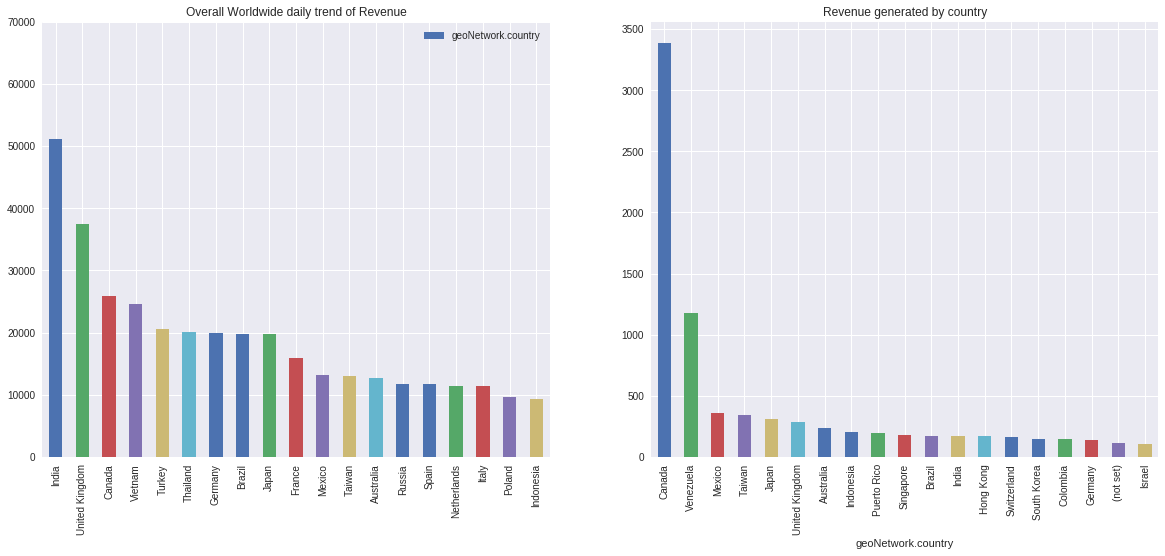

In [60]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_df["geoNetwork.country"].value_counts().iloc[1:20].plot(kind = "bar",ylim = (0,70000),legend="harrypotter")
plt.title("Overall Worldwide daily trend of Revenue")
plt.plot()
plt.subplot(1,2,2)
z = train_df.groupby("geoNetwork.country")["totals.transactionRevenue"].sum()
z = z.sort_values(ascending= False)
z[1:20,].plot.bar()
plt.title("Revenue generated by country")



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Monthly Revenue by all other countries')

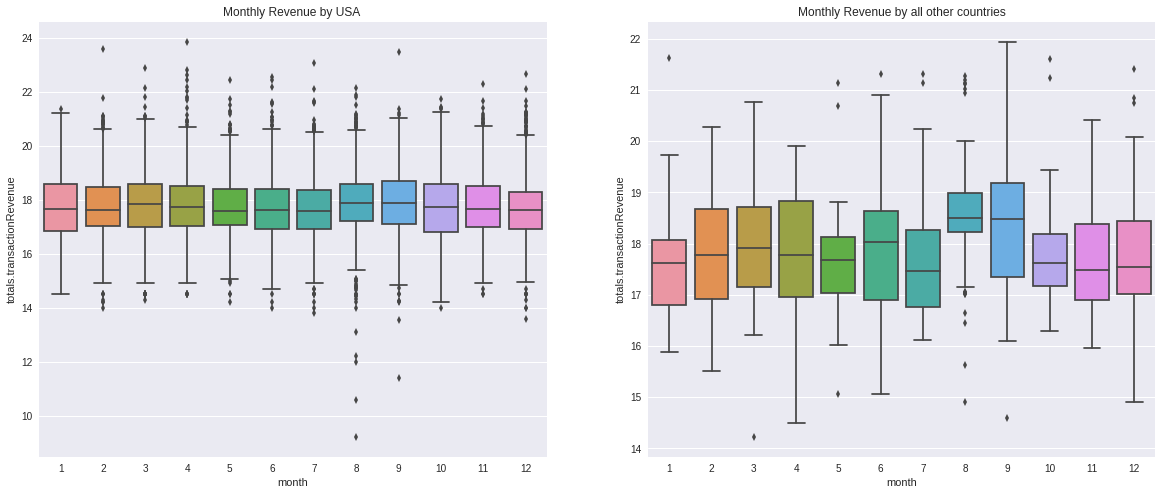

In [78]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df = train_df[train_df["geoNetwork.country"] == "United States"]
sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])
plt.title("Monthly Revenue by USA ")
plt.plot()
plt.subplot(1,2,2)
df = train_df[train_df["geoNetwork.country"] != "United States"]
sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])
plt.title("Monthly Revenue by all other countries")


**Graphs based on device columns**

Browser and visits

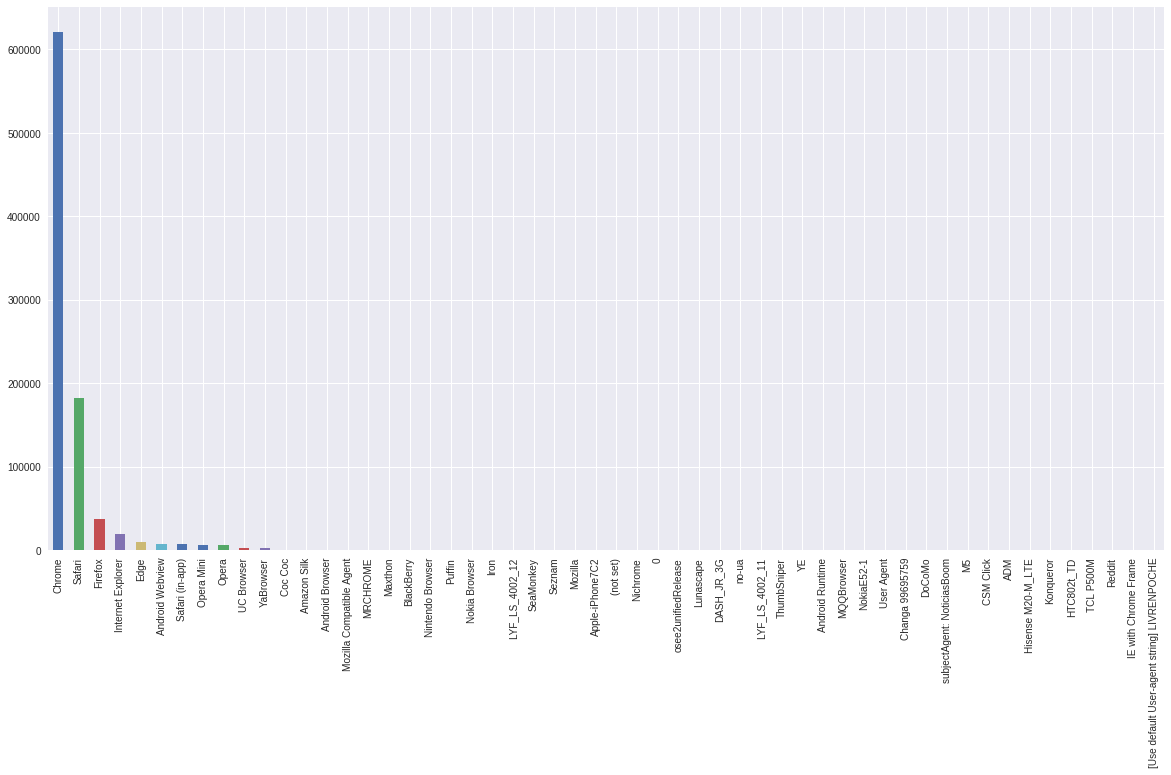

In [178]:
plt.figure(figsize=(20, 10))
train_df['device.browser'].value_counts().plot.bar()
plt.show()

In [0]:
sns.boxplot("month","totals.transactionRevenue",data = train_df[train_df["totals.transactionRevenue"] > 1])

pandas.core.series.Series

**Based on time**

**World wide trends **

In [0]:
date2 = train_df.groupby("date")["totals.transactionRevenue"].count()
#date2 = train_df["date"].value_counts(sort = False)

We can see there is direct relationship there (between visits and revenue)

In [0]:
c = train_df[(train_df["totals.transactionRevenue"] > 0) & (train_df["geoNetwork.country"] == "Canada")].groupby("date")["totals.transactionRevenue"].sum()
#

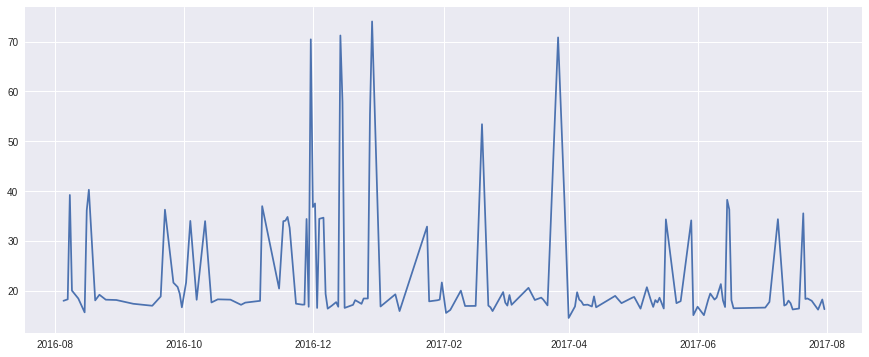

In [29]:
plt.figure(figsize=(15,6))
plt.plot(c)

In [53]:
train_df["geoNetwork.continent"].unique()

array(['Asia', 'Oceania', 'Europe', 'Americas', 'Africa', '(not set)'],
      dtype=object)

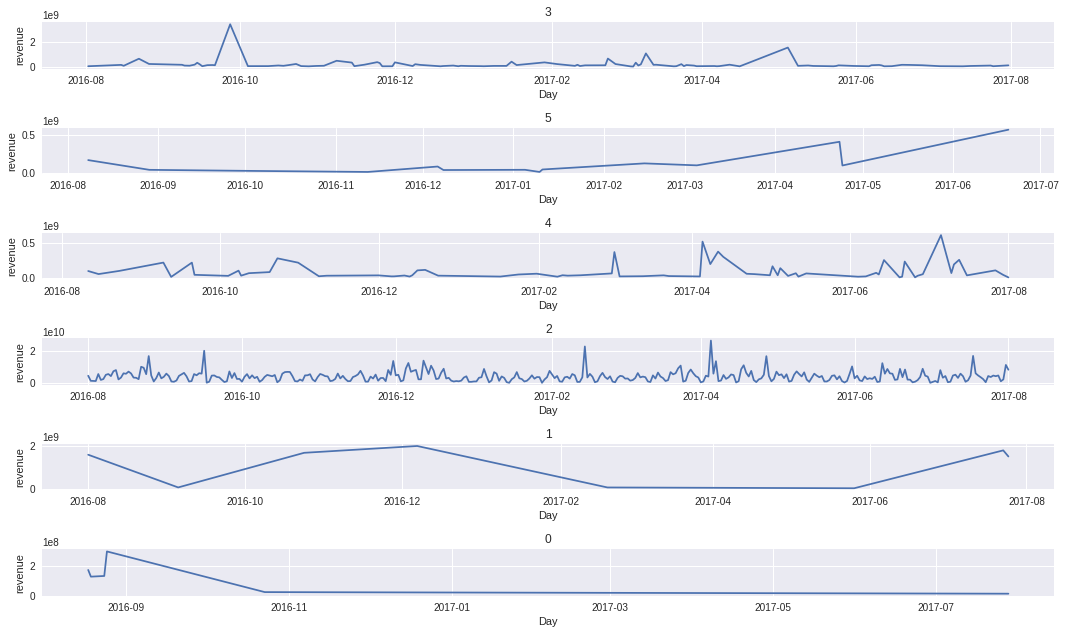

In [164]:
plt.figure(figsize=(15,10))
i = 1
for conti in train_df["geoNetwork.continent"].unique():
  revenue = train_df[(train_df["totals.transactionRevenue"] > 0) & (train_df["geoNetwork.continent"] == conti)].groupby("date")["totals.transactionRevenue"].sum()
  plt.subplot(7,1,i)
  plt.plot(revenue)
  plt.title(conti)
  plt.ylabel("revenue")
  plt.xlabel("Day")
  i = i+1
plt.tight_layout()
# plt.savefig("gdrive/conti_R.png")
plt.savefig("gdrive/My Drive/daily_line.png")


In [0]:
sns.barplot( x = train_df["month"] , y = train_df["totals.transactionRevenue"],   )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



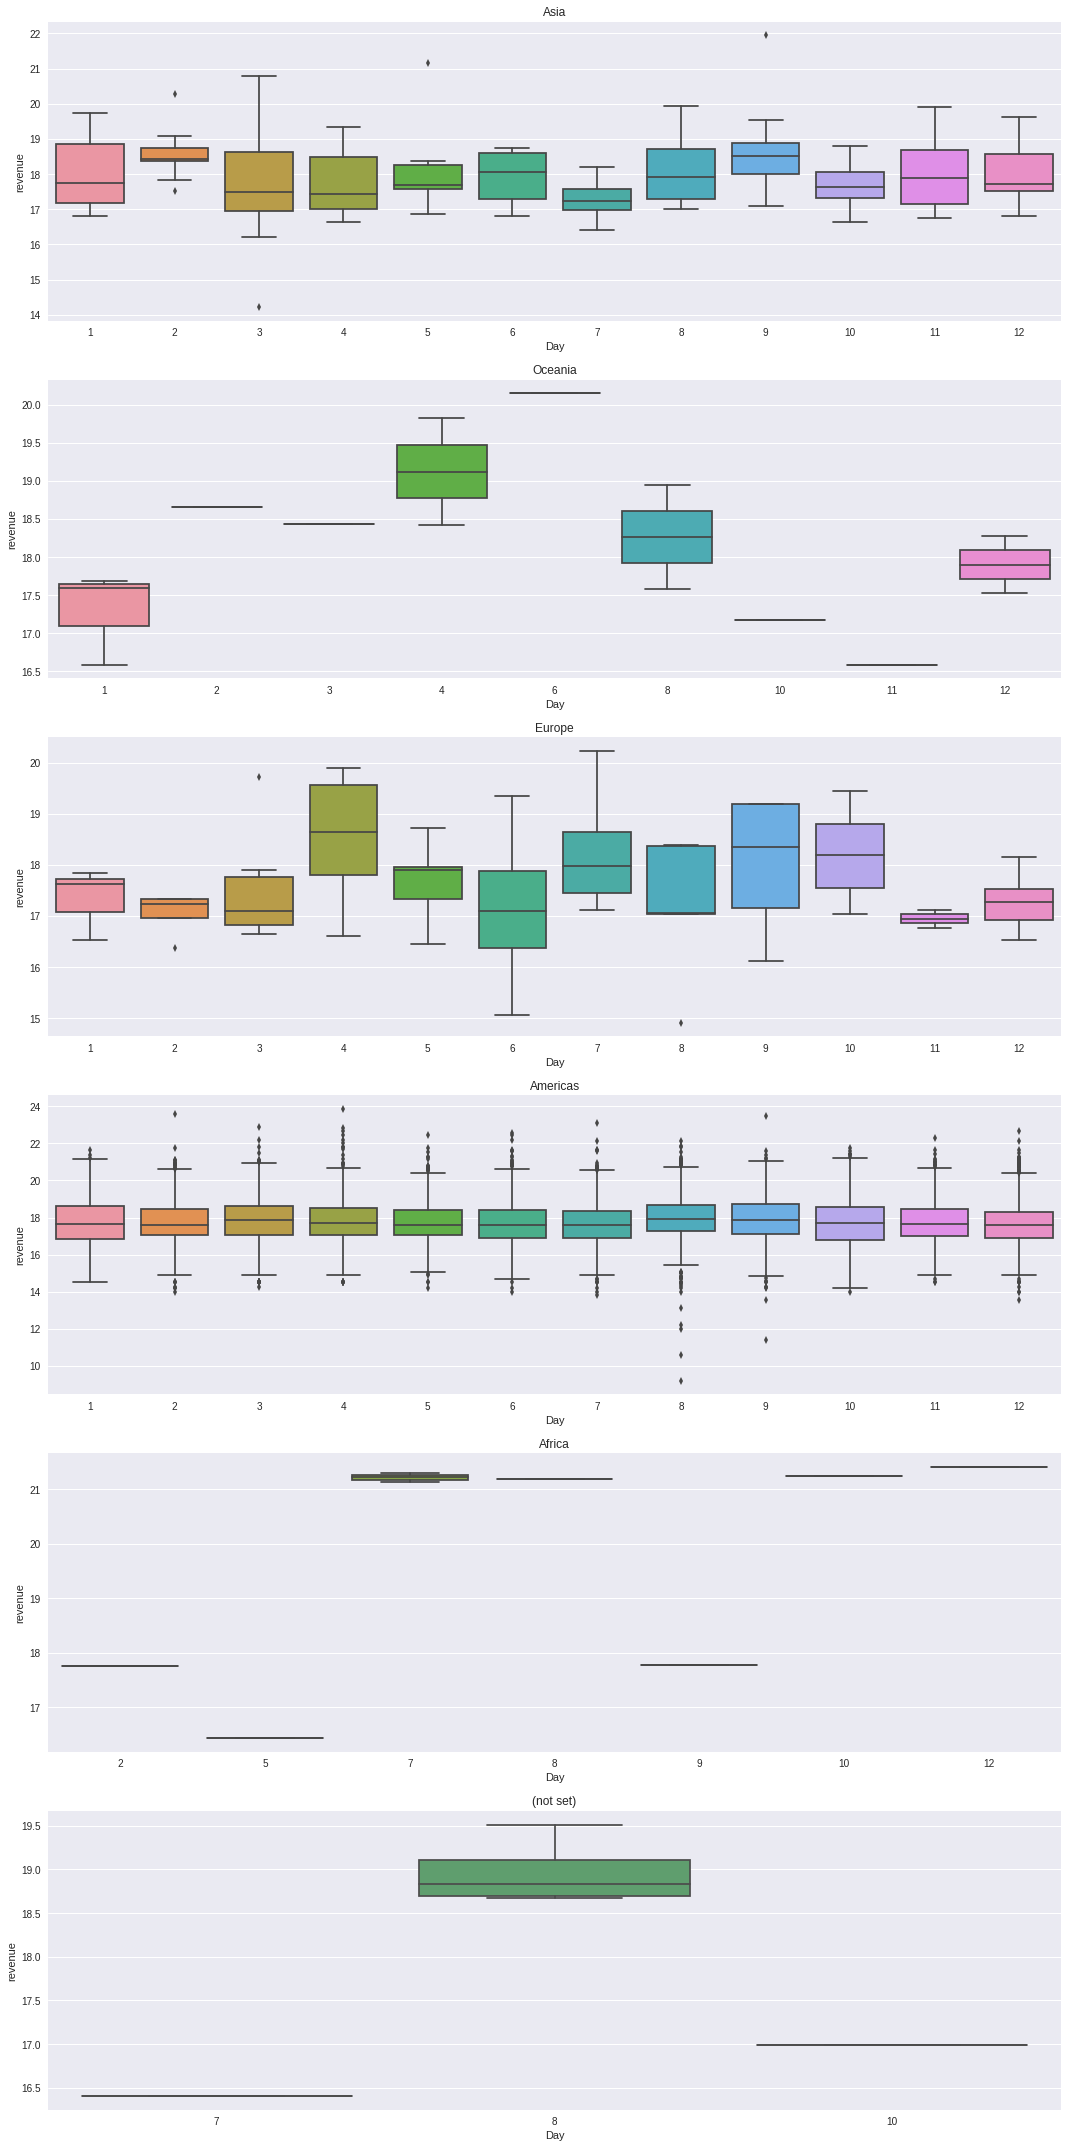

In [187]:
# plt.figure(figsize=(15,30))
# i = 1
# for conti in train_df["geoNetwork.continent"].unique():
#   df = train_df[train_df["geoNetwork.continent"] == conti]
#   plt.subplot(6,1,i)
#   sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])
#   plt.title(conti)
#   plt.ylabel("revenue")
#   plt.xlabel("Day")
#   i = i+1
# plt.tight_layout()
# # plt.savefig("gdrive/conti_R.png")
# # plt.savefig("gdrive/My Drive/test.png")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



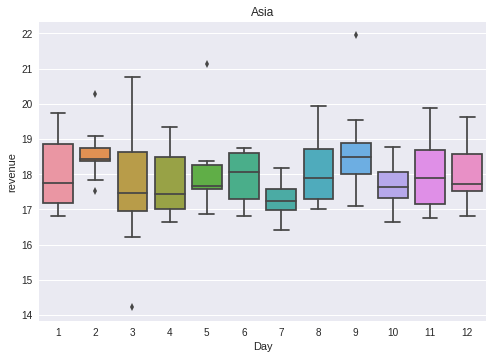

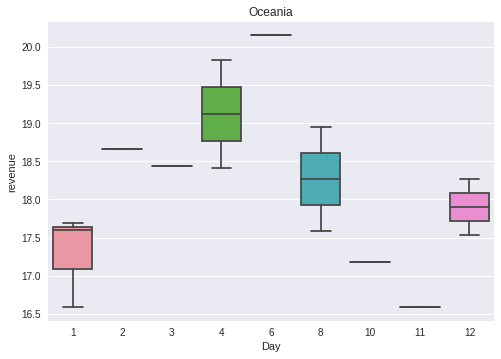

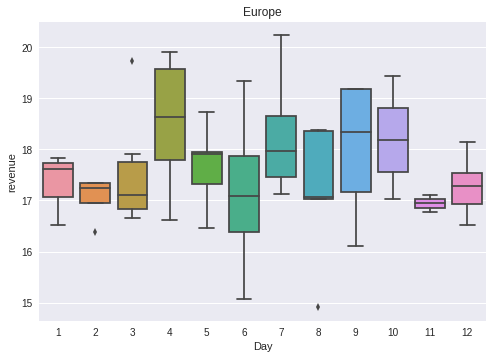

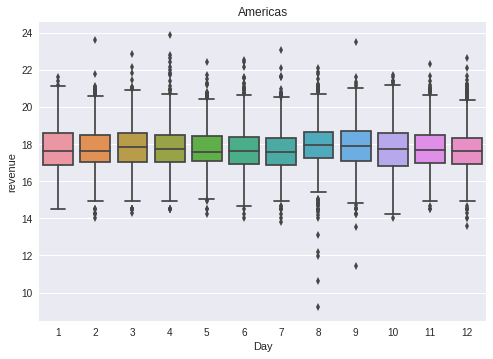

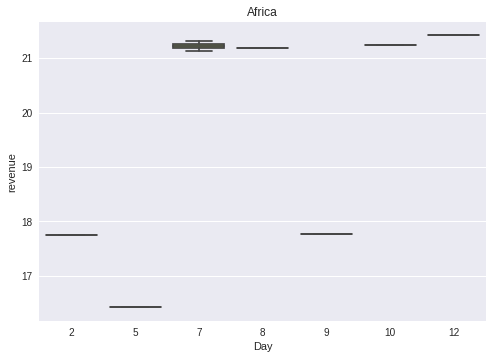

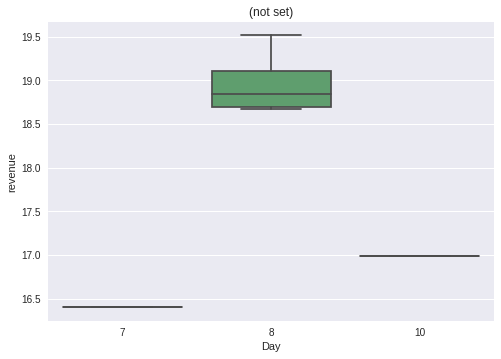

In [86]:
for conti in train_df["geoNetwork.continent"].unique():
  df = train_df[train_df["geoNetwork.continent"] == conti]
  sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])
  plt.title(conti)
  plt.ylabel("revenue")
  plt.xlabel("Month")
  plt.show()
plt.tight_layout()
# plt.savefig("gdrive/conti_R.png")
plt.savefig("gdrive/My Drive/box_plot.png")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



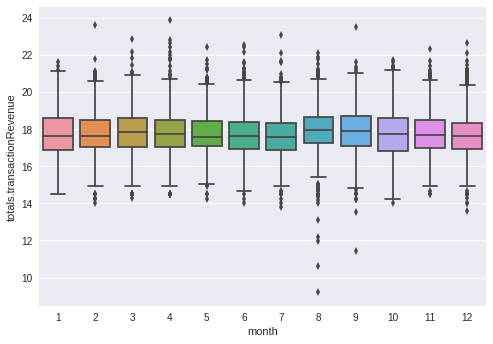

In [79]:
#df = train_df[train_df["geoNetwork.continent"] == "Americas"]
#sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


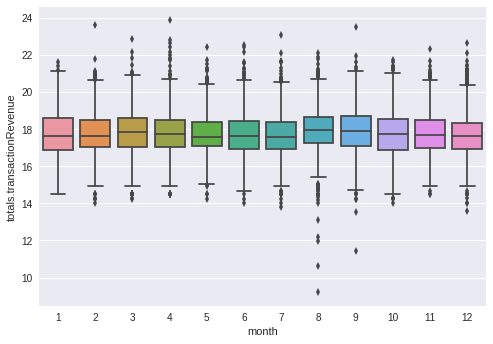

In [65]:
sns.boxplot("month","totals.transactionRevenue",data = train_df[train_df["totals.transactionRevenue"] > 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


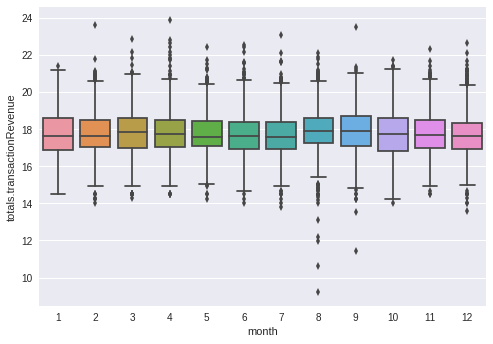

In [67]:
df = train_df[train_df["geoNetwork.country"] == "United States"]
sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


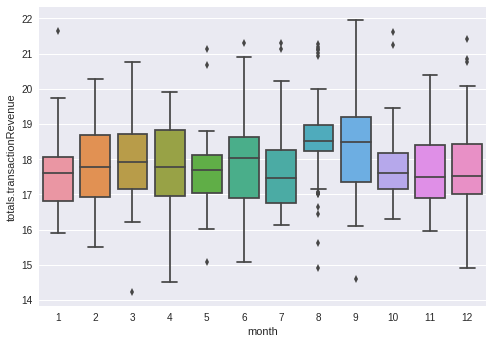

In [68]:
df = train_df[train_df["geoNetwork.country"] != "United States"]
sns.boxplot("month","totals.transactionRevenue",data = df[df["totals.transactionRevenue"] > 1])

In [69]:
df.shape

(538909, 38)

In [177]:
United States

(903653, 39)

In [0]:
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']

In [139]:
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [0]:
num_cols = ["month","day","totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

In [132]:
train_df["month"]

0         11
1         11
2         11
3         11
4         11
5         11
6         11
7         11
8         11
9         11
10        11
11        11
12        11
13        11
14        11
15        11
16        11
17        11
18        11
19        11
20        11
21        11
22        11
23        11
24        11
25        11
26        11
27        11
28        11
29        11
          ..
903623     0
903624     0
903625     0
903626     0
903627     0
903628     0
903629     0
903630     0
903631     0
903632     0
903633     0
903634     0
903635     0
903636     0
903637     0
903638     0
903639     0
903640     0
903641     0
903642     0
903643     0
903644     0
903645     0
903646     0
903647     0
903648     0
903649     0
903650     0
903651     0
903652     0
Name: month, Length: 903653, dtype: int64

In [0]:
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

In [0]:
# https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-ga-customer-revenue 
# I have used this kernel for referance

In [0]:
dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] 
test_X = test_df[cat_cols + num_cols] 

In [142]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.70251
[200]	valid_0's rmse: 1.69456
[300]	valid_0's rmse: 1.69371
Early stopping, best iteration is:
[279]	valid_0's rmse: 1.69202


In [0]:
test_id = test_df["fullVisitorId"].values

In [0]:
submission = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
submission["PredictedLogRevenue"] = np.expm1(pred_test)
submission = submission.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
submission.columns = ["fullVisitorId", "PredictedLogRevenue"]
submission["PredictedLogRevenue"] = np.log1p(submission["PredictedLogRevenue"])
submission.to_csv("baseline_lgb_new1.csv", index=False)

#Per user buying probability

In [0]:
train_df['bought_something1'] = train_df["totals.transactionRevenue"] > 0

In [0]:
prob_df = train_df[["totals.transactionRevenue",""]]

In [0]:
train_df['bought_something1'] = train_df['bought_something'].astype(int)

In [174]:
train_df['bought_something'].unique()

array([0, 1])

In [0]:
train_prob = train_df.groupby("fullVisitorId")["totals.transactionRevenue","totals.pageviews","totals.hits",""].reset_index()

In [176]:
train_prob = tr["tarin_df"]

Index(['fullVisitorId', 'totals.transactionRevenue', 'totals.pageviews',
       'totals.hits', 'bought_something'],
      dtype='object')

In [170]:
y = train_prob.iloc[:,5]
x = train_prob.iloc[:,2:4]

IndexError: ignored

In [0]:
probX  = train_df[cat_cols + num_cols] 
probY = np.log1p(train_df["totals.transactionRevenue"].values)

In [0]:
l = probY > 0

In [0]:
s = 1*l #convert to boolean

In [25]:
probX.isna().any()[lambda x: x]

totals.pageviews    True
totals.bounces      True
totals.newVisits    True
dtype: bool

In [0]:
#probX= probX.drop("totals.pageviews",axis = 1 )
#probX = probX.drop("totals.bounces",axis = 1 )
probX = probX.drop("totals.newVisits",axis = 1)

In [28]:
model = LogisticRegression()
model = model.fit(probX, s)
z = model.predict(x)


NameError: ignored

In [0]:
z = model.predict_proba(probX)

In [0]:
prob = z[:,1]

In [0]:
train_ddf1= train_df

In [0]:
train_ddf1["prob"] = prob

In [94]:
train_ddf1.groupby("fullVisitorId")["prob"].mean().sort_values(ascending=False).head(10)

fullVisitorId
423043652415339154     0.013312
8294721032567046680    0.013312
7718623669497357235    0.013312
4798058133221713505    0.013312
5076747981380011349    0.013312
3471645573420610711    0.013312
1080407219030471072    0.013312
8265862694719602421    0.013312
429222405901537951     0.013312
9023992206371203986    0.013312
Name: prob, dtype: float64

In [43]:
# train_ddf1["prob"].sort_values(ascending = False)
idx = np.argsort(train_ddf1["prob"])[-10:]
train_ddf1["fullVisitorId"].iloc[idx]

537930    4283942788674999975
538027    3471645573420610711
539202    1757409464136963580
538274    9234156111722725905
538454     143953260196124648
538453    5076747981380011349
539300    4798058133221713505
539087    7718623669497357235
538232    8294721032567046680
538675     423043652415339154
Name: fullVisitorId, dtype: object

In [169]:
y.unique()

array([ 0,  1,  2,  3,  5,  4,  7, 12,  6, 16, 11,  8, 13, 31, 10,  9])

In [52]:
train_prob.head()

,fullVisitorId,totals.transactionRevenue,device.deviceCategory,totals.hits
0,4823595352351,1,1,1
1,5103959234087,1,1,1
2,10278554503158,1,1,1
3,20424342248747,1,1,1
4,26722803385797,1,1,1


In [0]:
train_prob["totals.transactionRevenue"] = train_prob["totals.transactionRevenue"].sum

In [79]:
train_df["totals.transactionRevenue"].unique()

array([ 0.        , 17.44940573, 19.54128281, ..., 19.63041691,
       17.24140058, 18.05525334])

In [0]:
1957458976293878100    3.345943
824839726118485274     3.160485
1856749147915772585    2.426385
3608475193341679870    2.421374
3269834865385146569    1.924852
7634897085866546110    1.840042
720311197761340948     1.786294
4038076683036146727    1.670901
232377434237234751     1.647891
949718915643445721     1.567441

#Permutation test

In [279]:
dev_df["geoNetwork.city"].head(1)

0    426
Name: geoNetwork.city, dtype: int64

In [300]:
dev_df.dtypes


channelGrouping                                          int64
date                                            datetime64[ns]
fullVisitorId                                           object
sessionId                                               object
visitId                                                  int64
visitNumber                                            float64
visitStartTime                                         float64
device.browser                                           int64
device.deviceCategory                                    int64
device.isMobile                                           bool
device.operatingSystem                                   int64
geoNetwork.city                                          int64
geoNetwork.continent                                     int64
geoNetwork.country                                       int64
geoNetwork.metro                                         int64
geoNetwork.networkDomain                               

In [0]:
X_tr = dev_df
X_val = val_df

X_tr = X_tr.drop("date",axis= 1)
X_val = X_val.drop("date",axis = 1)

X_tr = X_tr.drop("fullVisitorId",axis = 1)
X_tr = X_tr.drop("sessionId",axis = 1)

X_val = X_val.drop("fullVisitorId",axis = 1)
X_val = X_val.drop("sessionId", axis = 1)


In [0]:
X_tr["geoNetwork.city"] = np.random.permutation(dev_df["geoNetwork.city"])

In [0]:
X_tr = dev_df
X_val = val_df

In [0]:
X_tr = X_tr.drop("totals.bounces",axis = 1)
X_tr = X_tr.drop("totals.newVisits", axis= 1)
X_tr = X_tr.drop("totals.pageviews", axis = 1)

X_val = X_val.drop("totals.bounces",axis = 1)
X_val = X_val.drop("totals.newVisits", axis= 1)
X_val = X_val.drop("totals.pageviews", axis = 1)





In [0]:
model = LinearRegression()

In [0]:
error = []

In [151]:
#X_tr["geoNetwork.city"] = np.random.permutation(dev_df["geoNetwork.city"])
  #X_tr = normalize(X_tr)
  #X_val = normalize(X_val)
model = model.fit(X_tr, dev_y)
y_pred = model.predict(X_val)
er = mean_squared_error(val_y, y_pred)
print(er)

3.4726463429643935


In [153]:
for i in range(0,100):
  X_tr["geoNetwork.metro"] = np.random.permutation(dev_df["geoNetwork.metro"])
  model = model.fit(X_tr, dev_y)
  y_pred = model.predict(X_val)
  E = mean_squared_error(val_y, y_pred)
  print(E)
  error.append(E)

3.472701141653415
3.472671977331754
3.4726548749235326
3.472675005625494
3.472698948764502
3.4726423783906606
3.472674480975073
3.4726705424383892
3.47265050976026
3.4726544289251913
3.4726338274999966
3.4727015780771833
3.4726377456269444
3.4726727539331397
3.472652949184029
3.472610234738389
3.472676170942839
3.4726569854953246
3.472631578483821
3.4726244578582377
3.4726805962200906
3.4727206261569994
3.4726609722682076
3.4727113310865017
3.4726685349827426
3.472655256729391
3.472677692215776
3.4726744208071105
3.472663966898336
3.4726600193763484
3.472688652977877
3.4726857477036255
3.4727222557502273
3.472627957519757
3.472637274460386
3.472629155981573
3.4726709699485223
3.4726733434937604
3.472655100026978
3.4726736154187234
3.472690045537373
3.472675258540261
3.472658065920305
3.47268744229743
3.4726592790206143
3.4726453766014886
3.4726989981184504
3.4726712930657646
3.472662407059393
3.4727201602821784
3.4726423358391987
3.4726943697470243
3.4726896145263093
3.4726434793402086

In [160]:
cnt = 0
for c in error:
  if c < er:
    cnt = cnt+1
cnt

1

In [302]:
X_tr.isna().any()[lambda x: x]

totals.bounces      True
totals.newVisits    True
totals.pageviews    True
dtype: bool

In [0]:
X_tr = normalize(X_tr)

In [320]:
X_tr.sh

(765707, 32)

In [0]:
geo = error

In [362]:
len(geo)

102

In [0]:
geoT = E

In [0]:
o = error[102:300]

In [0]:
E = 3.4731

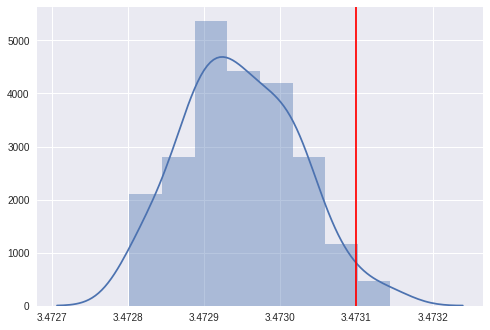

In [444]:
ax = sns.distplot(o)
ax.axvline(E, color='r')

In [157]:
for i in range(0,100):
  X_tr["geoNetwork.continent"] = np.random.permutation(dev_df["geoNetwork.continent"])
  model = model.fit(X_tr, dev_y)
  y_pred = model.predict(X_val)
  E = mean_squared_error(val_y, y_pred)
  print(E)
  error.append(E)

3.4730023704740534
3.473158340446812
3.4729791207120337
3.4729967454714905
3.472749859690722
3.473126874258665
3.4731797889745524
3.4730671319899384
3.4727801504305544
3.4731177379141887
3.472794429897137
3.473277222930203
3.472977217460518
3.4728673766808806
3.4730469339585337
3.4732574144515045
3.472977217514347
3.4730294261691137
3.472849554279328
3.4730246482612084
3.473445049169924
3.472899500806721
3.473241868098745
3.4727488839933685
3.472907812732131
3.4728118423412253
3.472935249505444
3.4733287633430936
3.4729513950955906
3.4730852400774848
3.4731783696947445
3.4727689967628694
3.47323799695826
3.473216844214583
3.4729965801861735
3.4729221389051115
3.4730563138385033
3.4728562200132944
3.473033863478607
3.4728736489776466
3.473181264763304
3.4729887987518424
3.473095720607847
3.473053620455259
3.4729107830578245
3.4730182555464415
3.473155374330836
3.4731924801735357
3.4732046201021785
3.472967795695953
3.472651961735846
3.4731156216458965
3.4730087884670273
3.47297940149615

In [0]:
ln = error[202:303]

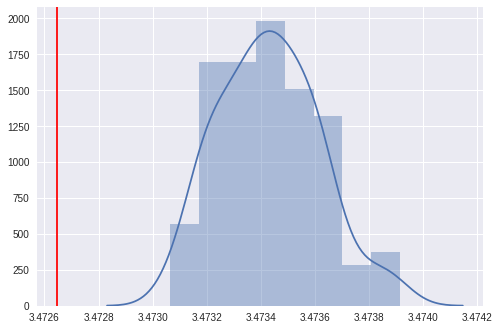

In [438]:
ax = sns.distplot(ln)
ax.axvline(er, color='r')

In [159]:
for i in range(0,100):
  X_tr["device.operatingSystem"] = np.random.permutation(dev_df["device.operatingSystem"])
  model = model.fit(X_tr, dev_y)
  y_pred = model.predict(X_val)
  E = mean_squared_error(val_y, y_pred)
  print(E)
  error.append(E)

3.4744597180918753
3.4742808465508688
3.4741553245712407
3.4741094901549507
3.4740802454781075
3.474389014023752
3.474202382597474
3.474408392188406
3.4743115024841065
3.4742252108108507
3.4741166501749365
3.4742611653761757
3.4739630491320903
3.4737653268605255
3.4743104734797776
3.474025225413684
3.473967081627645
3.4744048382081845
3.474289112343853
3.473992135233924
3.47429780034404
3.474117177904056
3.474040868168873
3.474231003129755
3.474194608140803
3.4742614089864383
3.4742359326941346
3.474507157116516
3.474108290297215
3.474282328234143
3.4741116916838637
3.4744988135004156
3.474192464936821
3.474397099661372
3.473993216658456
3.4739040585686545
3.4743690240531033
3.4740921683949475
3.474564753220362
3.474088742075742
3.474346332743797
3.4742702258803924
3.4745895409972216
3.473962085478073
3.474124706022945
3.4739834517098567
3.474306958571908
3.4742080330668723
3.474181196366442
3.474040639383223
3.474332840678042
3.474392330220646
3.474162495496038
3.4741026512547686
3.47

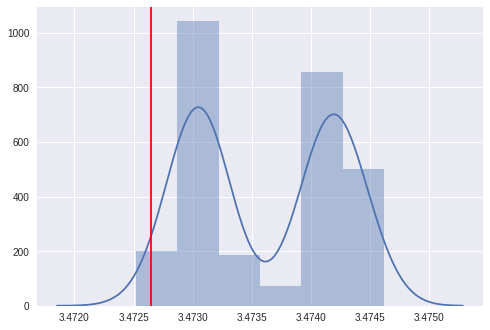

In [161]:
ax = sns.distplot(error)
ax.axvline(er, color='r')